DATASET DARI PERUSAHAAN (PRIVASI)
preprocessing data tidak ditunjukkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix

In [ ]:
df = pd.read_csv('encodefinal.csv')
df.head()

,Job Title,Count Month,Result
0,235,37,0
1,76,33,0
2,76,32,0
3,238,20,0
4,82,33,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Job Title    447 non-null    int64
 1   Count Month  447 non-null    int64
 2   Result       447 non-null    int64
dtypes: int64(3)
memory usage: 10.6 KB


In [ ]:
df.shape

(447, 3)

In [ ]:
df.Result.value_counts()

Result
1    349
0     98
Name: count, dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
X = df.drop(columns = ['Result'])
y = df['Result']

print("X : ", X.shape)
print("y : ", y.shape)

X :  (447, 2)
y :  (447,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test_scaled)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print(f'Accuracy Decision Tree: {accuracy * 100:.2f}%')

Confusion Matrix:
[[19  8]
 [ 7 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.70      0.72        27
           1       0.88      0.89      0.88        63

    accuracy                           0.83        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.83      0.83      0.83        90

Accuracy Decision Tree: 83.33%


In [ ]:
X_new = pd.DataFrame({
    'Job Title' : [76],
    'Count Month' : [33]
})

X_new_scaled = scaler.transform(X_new)
predictions = model.predict(X_new_scaled)

In [ ]:
print('Prediksi Data Baru: ', predictions)

print("Hasil Prediksi: ", end='')
for pred in predictions:
    if pred == 1:
        print("Tidak Sukses", end=' ')
    else:
        print("Sukses", end=' ')
print()

Prediksi Data Baru:  [0]
Hasil Prediksi: Sukses 


In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

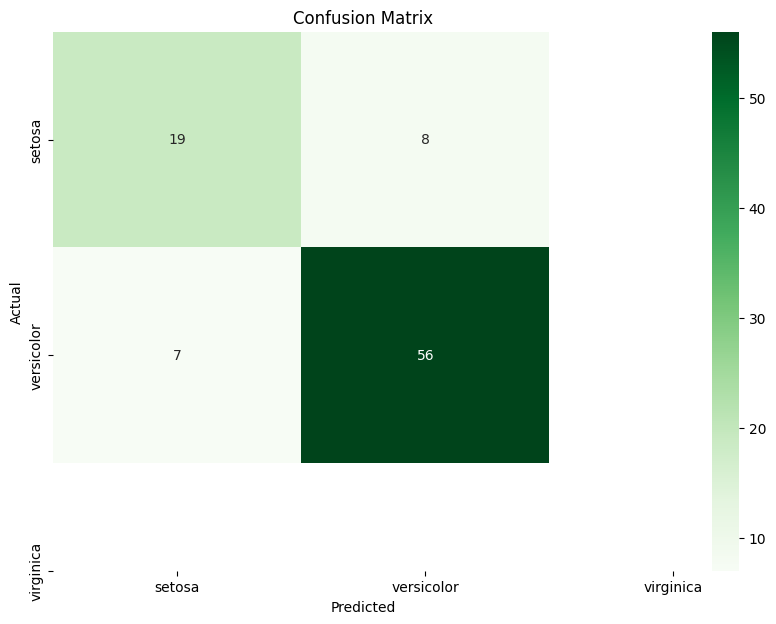

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()